In [82]:
#Import Packages
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch



In [83]:
#Import Data
flight_data=pd.read_csv('06_EastWestAirlinesCluster.csv')

In [84]:
flight_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [85]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [91]:
#Drop columns
X = flight_data.drop(columns=['ID#', 'Award?'])

In [92]:
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [93]:
# Normalize the data
scaler = StandardScaler()
scaled_flight_data = scaler.fit_transform(X)


In [94]:
scaled_flight_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [95]:
print(pd.DataFrame(scaled_flight_data, columns=X.columns))

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
3994 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
3995 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
3996 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
3997 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
3998 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0       -1.1

In [96]:
from sklearn.cluster import AgglomerativeClustering

# Perform Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=15, linkage='ward', metric = 'euclidean') 

hierarchical_clustering.fit(scaled_flight_data)

AgglomerativeClustering(distance_threshold=15, n_clusters=None)

In [110]:
clusters = hierarchical_clustering.fit_predict(scaled_flight_data) 

In [111]:
n_clusters = len(set(clusters))
print(f'Number of clusters: {n_clusters}')

Number of clusters: 34


In [113]:
X['Clusters'] = clusters

In [114]:
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,25
1,19244,0,1,1,1,215,2,0,0,6968,25
2,41354,0,1,1,1,4123,4,0,0,7034,25
3,14776,0,1,1,1,500,1,0,0,6952,25
4,97752,0,4,1,1,43300,26,2077,4,6935,14
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,7
3995,64385,0,1,1,1,981,5,0,0,1395,7
3996,73597,0,3,1,1,25447,8,0,0,1402,23
3997,54899,0,1,1,1,500,1,500,1,1401,7


In [115]:
X['Clusters'].nunique()

34

In [116]:
# Answer 2. If you don't normalize the data beforehand, predictors with larger values will skew clustering and the results will be skewed as well.  Normalization helps with the different magnitudes in the dataset.

In [103]:
cluster_centroids = X.groupby('Clusters').mean()
print(cluster_centroids)

               Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Clusters                                                               
0         1.493722e+05   743.730769   2.461538   1.000000   1.000000   
1         1.048029e+05    27.531915   1.010638   1.000000   1.000000   
2         4.597532e+05    51.200000   4.750000   1.000000   1.000000   
3         7.817374e+04  1826.923077   2.292308   1.000000   1.000000   
4         1.461994e+05     0.000000   3.363636   1.000000   4.454545   
5         1.319995e+05   347.000000   2.500000   1.000000   1.000000   
6         1.042253e+05     9.032028   3.989324   1.000000   1.000000   
7         3.004168e+04    15.676152   1.000000   1.000000   1.000000   
8         2.064022e+05     4.464286   1.160714   1.000000   1.000000   
9         2.302089e+05  3313.000000   1.117647   1.000000   1.000000   
10        1.013485e+05  7650.619048   1.904762   1.000000   1.000000   
11        1.095058e+05   104.222973   4.966216   1.000000   1.00

In [118]:
cluster_centroids.to_csv('ClusterCentroids.csv', index=True)

In [119]:
#Import Data
centroid_data=pd.read_csv('ClusterCentroids.csv')

In [120]:
centroid_data

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,1.493722e+05,743.730769,2.461538,1.000000,1.000000,41513.346154,35.846154,9175.769231,24.307692,4335.269231
1,1,1.048029e+05,27.531915,1.010638,1.000000,1.000000,7284.127660,10.808511,2942.372340,7.946809,3201.170213
2,2,4.597532e+05,51.200000,4.750000,1.000000,1.000000,158529.900000,26.350000,1338.250000,3.600000,5512.400000
3,3,7.817374e+04,1826.923077,2.292308,1.000000,1.000000,20184.384615,11.923077,355.046154,1.153846,5114.107692
4,4,1.461994e+05,0.000000,3.363636,1.000000,4.454545,100957.090909,26.363636,390.909091,1.181818,4452.090909
5,5,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
6,6,1.042253e+05,9.032028,3.989324,1.000000,1.000000,37988.811388,16.469751,98.626335,0.288256,3512.879004
7,7,3.004168e+04,15.676152,1.000000,1.000000,1.000000,2387.308943,3.300813,93.878049,0.352304,1769.153117
8,8,2.064022e+05,4.464286,1.160714,1.000000,1.000000,6965.107143,8.678571,156.535714,0.607143,5421.696429
9,9,2.302089e+05,3313.000000,1.117647,1.000000,1.000000,12501.176471,17.764706,3928.058824,12.235294,4312.705882


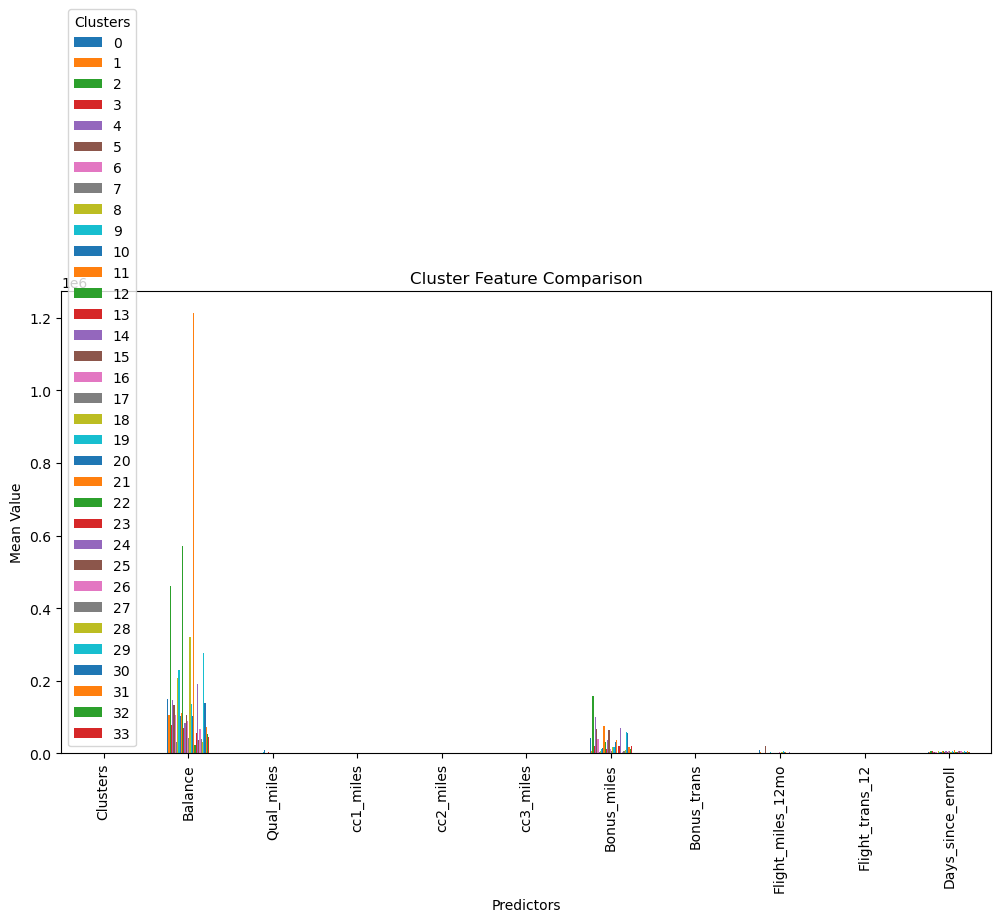

In [130]:
import matplotlib.pyplot as plt

centroid_data.T.plot(kind='bar', figsize=(12, 6))  #why transpose here?
plt.title('Cluster Feature Comparison')
plt.xlabel('Predictors')
plt.ylabel('Mean Value')
plt.legend(title='Clusters')
plt.show()

In [ ]:
#Cluster 0 = Casual Spender with likely High Engagement who is likely a Frequent Flyer and a Newer Member

#Cluster 1 = Casual Spender with likely Low Engagement who is likely a Frequent Flyer and a	Newer Member

#Cluster 2 = Frequent Spender with likely High Engagement who is likely a Casual Flyer and a Loyal Member

#Cluster 3 = Casual Spender with likely Low Engagement who is likely a Casual Flyer and a Loyal Member

#Cluster 4 = Casual Spender with likely High Engagement who is likely a Casual Flyer and a Newer Member

#Cluster 5 = Casual Spender with likely High Engagement who is likely a Frequent Flyer and a Newer Member

#Cluster 6 = Casual Spender with likely High Engagement who is likely a Casual Flyer and a Newer Member

#Cluster 7 = Casual Spender with likely Low Engagement who is likely a Casual Flyer and a Newer Member

#Cluster 8 = Frequent Spender with likely Low Engagement who is likely a Casual Flyer and a Loyal Member

#Cluster 9 = Frequent Spender with likely Low Engagement who is likely a Frequent Flyer and a Newer Member

#Cluster 10 = Casual Spender with likely Low Engagement who is likely a Casual Flyer and a Newer Member

#Cluster 11 = Casual Spender with likely High Engagement who is likely a Casual Flyer and a Loyal Member

#Cluster 12 = Frequent Spender with likely Low Engagement who is likely a Casual Flyer and a Loyal Member

#Cluster 13 = Casual Spender with likely Low Engagement who is likely a Casual Flyer and a Newer Member

#Cluster 14 = Casual Spender with likely high Engagement who is likely a Casual Flyer and a loyal Member

#Cluster 15 = Casual Spender with likely high Engagement who is likely a Casual Flyer and a Newer Member

#Cluster 16 = Casual Spender with likely Low Engagement who is likely a Frequent Flyer and a loyal Member

#Cluster 17 = Casual Spender with likely Low Engagement who is likely a casual Flyer and a loyal Member

#Cluster 18 = Frequent Spender with likely Low Engagement who is likely a Frequent Flyer and a newer Member

#Cluster 19 = casual Spender with likely Low Engagement who is likely a Frequent Flyer and a loyal Member

#Cluster 20 = casual Spender with likely high Engagement who is likely a Frequent Flyer and a newer Member

#Cluster 21 = frequent Spender with likely high Engagement who is likely a Frequent Flyer and a loyal Member

#Cluster 22 = casual Spender with likely low Engagement who is likely a casual Flyer and a newer Member

#Cluster 23 = casual Spender with likely low Engagement who is likely a casual Flyer and a newer Member

#Cluster 24 = frequent Spender with likely high Engagement who is likely a Frequent Flyer and a loyal Member

#Cluster 25 = casual Spender with likely low Engagement who is likely a casual Flyer and a loyal Member

#Cluster 26 = casual Spender with likely low Engagement who is likely a casual Flyer and a loyal Member

#Cluster 27 = casual Spender with likely low Engagement who is likely a casual Flyer and a newer Member

#Cluster 28 = casual Spender with likely low Engagement who is likely a casual Flyer and a newer Member

#Cluster 29 = frequent Spender with likely high Engagement who is likely a casual Flyer and a loyal Member

#Cluster 30 = casual Spender with likely high Engagement who is likely a casual Flyer and a newer Member

#Cluster 31 = casual Spender with likely low Engagement who is likely a casual Flyer and a loyal Member

#Cluster 32 = casual Spender with likely low Engagement who is likely a casual Flyer and a newer Member

#Cluster 33 = casual Spender with likely low Engagement who is likely a casual Flyer and a newer Member
